# Project_Title: Uber Data Analysis
## Project_id:2019029
### By: Kashish Gupta 1902900100080
### Mansi Gupta 1902900100090
### Khushi Patel 1902900100083
### Under the supervision of Dr. K. K. Agarwal

# Step1:Importing libraries and read the data


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar
from sklearn.cluster import KMeans


In [6]:
data=pd.read_csv("Downloads/MyUberDrives-2016.csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Step2: Cleaning the data

In [3]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [4]:
data=data[:-1]

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [6]:
# checking for  null values in data

<AxesSubplot:>

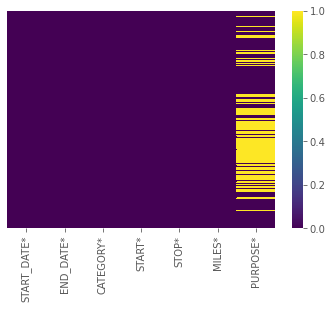

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [8]:
# Removing null values from the data

<AxesSubplot:>

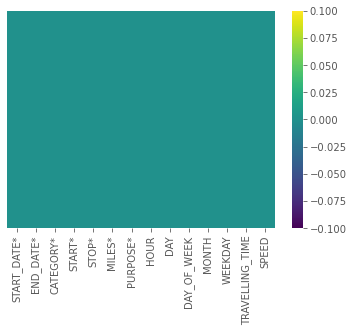

In [25]:
data=data.dropna()
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [11]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Step3:Transforming the data
## Getting an hour, day, days of the week, a month from the date of the trip.

In [12]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],errors='coerce', format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'],errors='coerce', format="%m/%d/%Y %H:%M")
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name)
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [13]:
# Finding travelling time

In [14]:
time=[]
data['TRAVELLING_TIME']=data['END_DATE*']-data['START_DATE*']
for i in data['TRAVELLING_TIME']:
    time.append(i.seconds/60)
data['TRAVELLING_TIME']=time
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN
5,NaT,NaT,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN


In [15]:
# Calculating the average speed of the trip.

In [16]:
data['TRAVELLING_TIME']=data['TRAVELLING_TIME']/60
data['SPEED']=data['MILES*']/data['TRAVELLING_TIME']
data.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN,NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN,NaN
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN,NaN
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN,NaN
5,NaT,NaT,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,NaN,NaN,NaN,NaN,"(Monday, Tuesday, Wednesday, Thursday, Friday,...",NaN,NaN


# Step-4 Visualizing the data

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

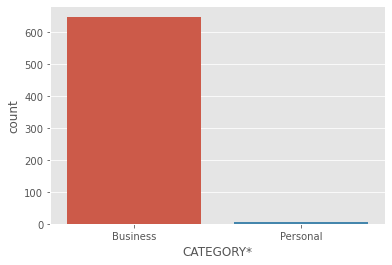

In [17]:
sns.countplot(x='CATEGORY*',data=data)

###  From data, we can see most of the people use UBER for business purposes.



<AxesSubplot:ylabel='Frequency'>

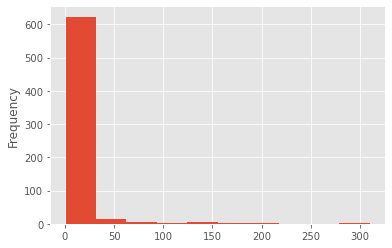

In [18]:
data['MILES*'].plot.hist()

###   From the above histogram we can see that most of people not having a long trip

<AxesSubplot:>

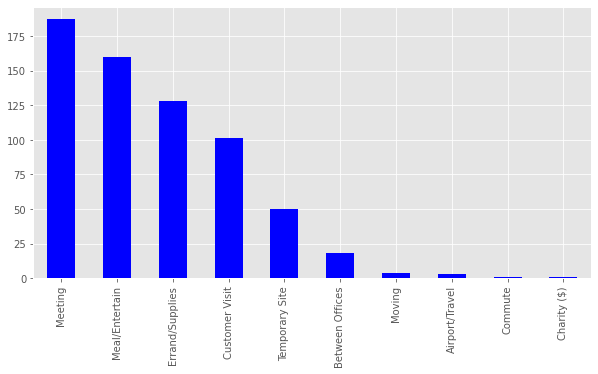

In [19]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

### Trips for purpose: From the above plot we can see that mostly the purpose of the trip is meeting and meal/entertain.

<AxesSubplot:>

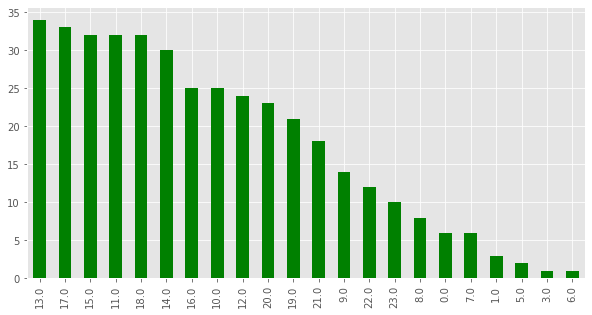

In [20]:
data['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

### Trips per hour of the day is visualized in the above bar plot




<AxesSubplot:>

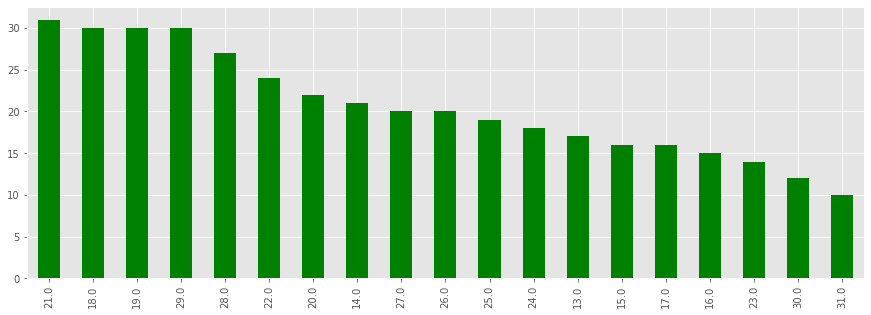

In [21]:
data['DAY'].value_counts().plot(kind='bar',figsize=(15,5),color='green')

### Trips per day of months is visualized in the above graph

<AxesSubplot:>

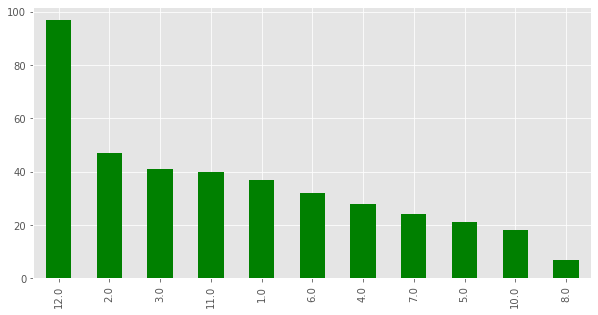

In [22]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

### Trips per months in a year

<AxesSubplot:>

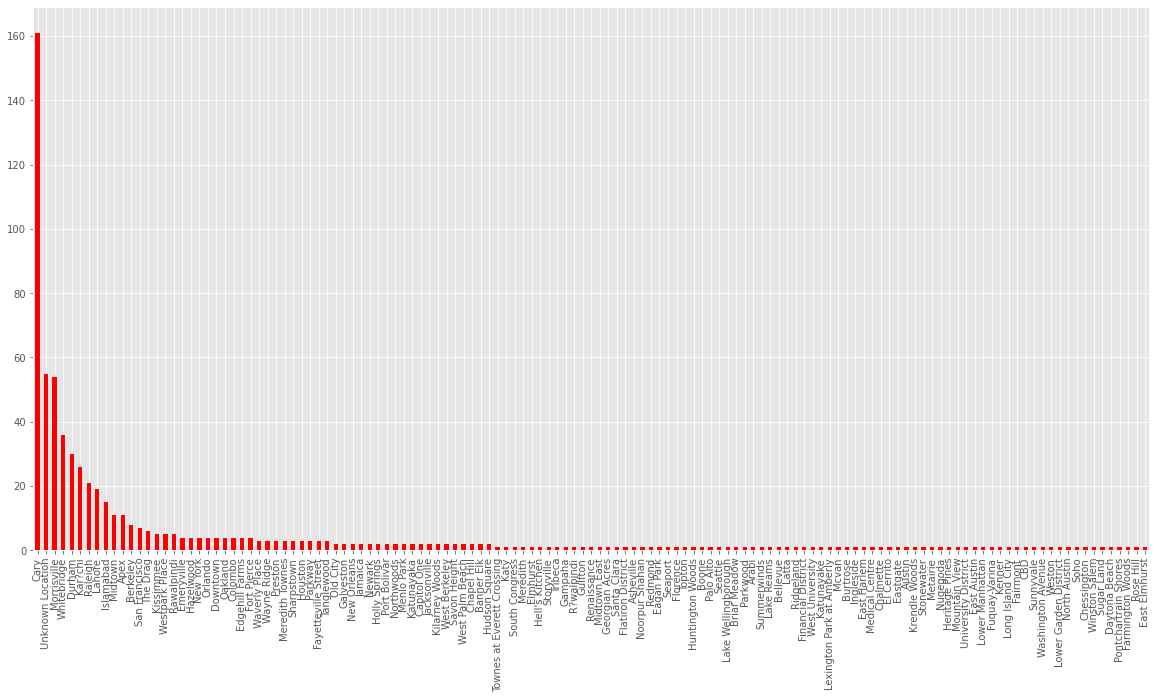

In [23]:
data['START*'].value_counts().plot(kind='bar',figsize=(20,10),color='red')

###  In the above bar graph it is visualized the starting points of trips. The highest number of people are from Cary who takes the trip.

<AxesSubplot:xlabel='PURPOSE*'>

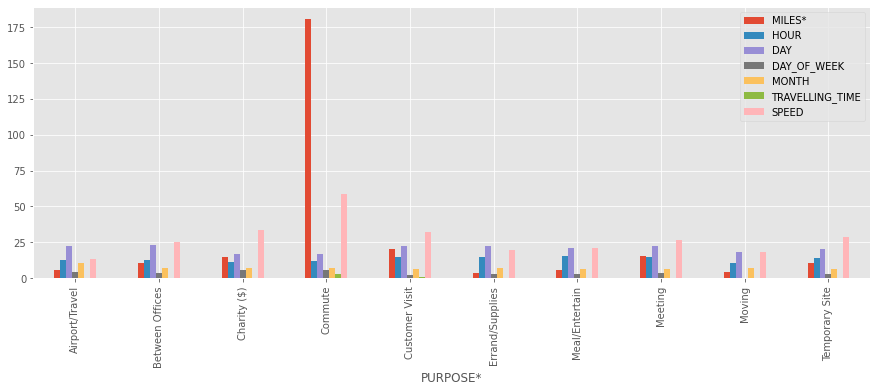

In [24]:
data.groupby('PURPOSE*').mean().plot(kind='bar',figsize=(15,5))

### In the above graph we have done the comparision of all the purpose with miles, hour, day of the month, day of the week, month, Travelling time